In [1]:
# mounting google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Since there have been error of font "Times New Roman", we can run it locally.

In [7]:
# Install Times New Roman
!apt-get -y install ttf-mscorefonts-installer fontconfig
# fc-cache -f -v

# Restart runtime after installing.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fontconfig is already the newest version (2.13.1-4.2ubuntu5).
ttf-mscorefonts-installer is already the newest version (3.8ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
# Copy dataset from google drive and unzip.
!mkdir /content/data
!mkdir /content/data/train
!mkdir /content/data/val
!cp /content/drive/MyDrive/IEEE_Access/dataset/train.zip /content/data/train.zip
!cp /content/drive/MyDrive/IEEE_Access/dataset/val.zip   /content/data/val.zip
!unzip /content/data/train.zip -d /content/data/train
!unzip /content/data/val.zip   -d /content/data/val

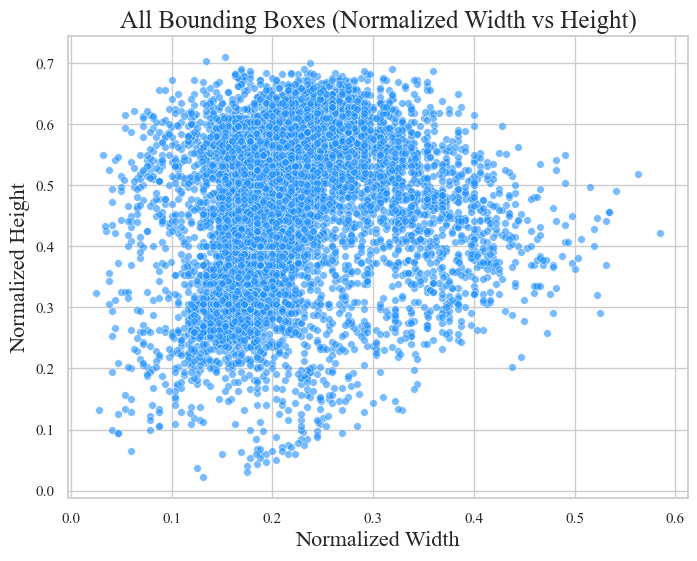


Cluster Centers for k=2:
  Cluster 0: Width=0.1962, Height=0.3271
  Cluster 1: Width=0.2246, Height=0.5387


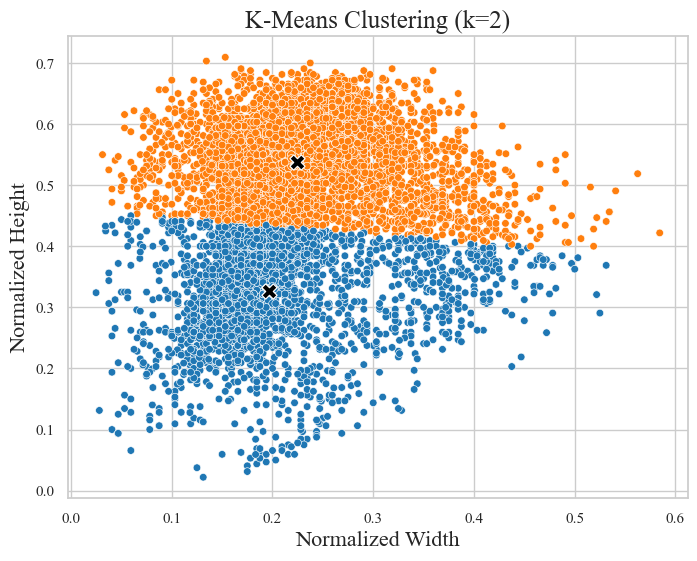


Cluster Centers for k=3:
  Cluster 0: Width=0.1767, Height=0.3239
  Cluster 1: Width=0.2116, Height=0.5441
  Cluster 2: Width=0.3596, Height=0.4399


<Figure size 640x480 with 0 Axes>

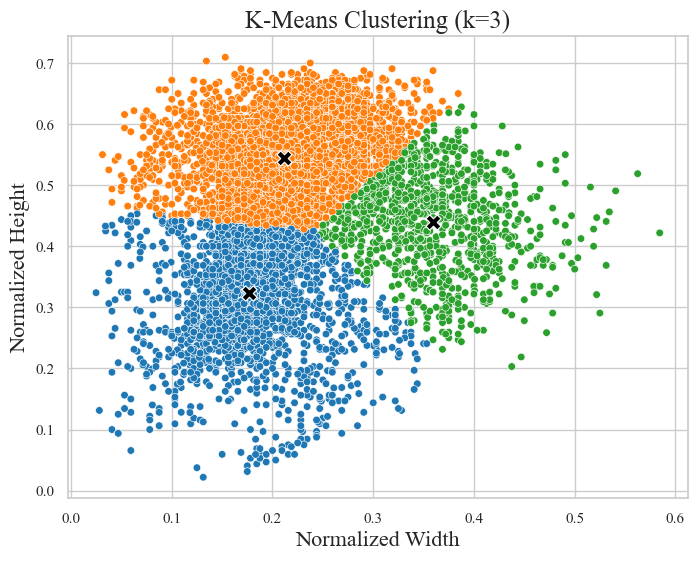


Cluster Centers for k=4:
  Cluster 0: Width=0.1864, Height=0.4674
  Cluster 1: Width=0.2255, Height=0.5771
  Cluster 2: Width=0.1758, Height=0.2906
  Cluster 3: Width=0.3616, Height=0.4374


<Figure size 640x480 with 0 Axes>

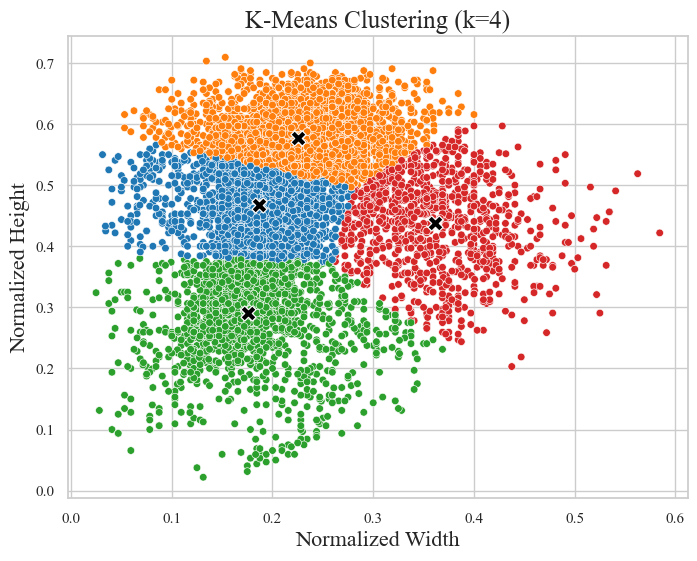


Cluster Centers for k=5:
  Cluster 0: Width=0.1799, Height=0.3839
  Cluster 1: Width=0.2368, Height=0.5894
  Cluster 2: Width=0.1744, Height=0.2520
  Cluster 3: Width=0.3630, Height=0.4346
  Cluster 4: Width=0.1910, Height=0.5064


<Figure size 640x480 with 0 Axes>

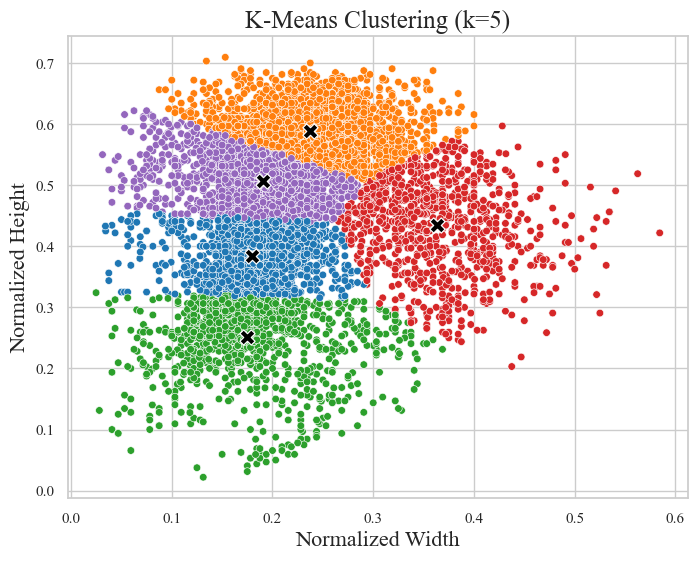


Cluster Centers for k=6:
  Cluster 0: Width=0.1569, Height=0.2817
  Cluster 1: Width=0.2401, Height=0.5952
  Cluster 2: Width=0.2764, Height=0.2143
  Cluster 3: Width=0.3614, Height=0.4506
  Cluster 4: Width=0.1826, Height=0.4080
  Cluster 5: Width=0.1940, Height=0.5192


<Figure size 640x480 with 0 Axes>

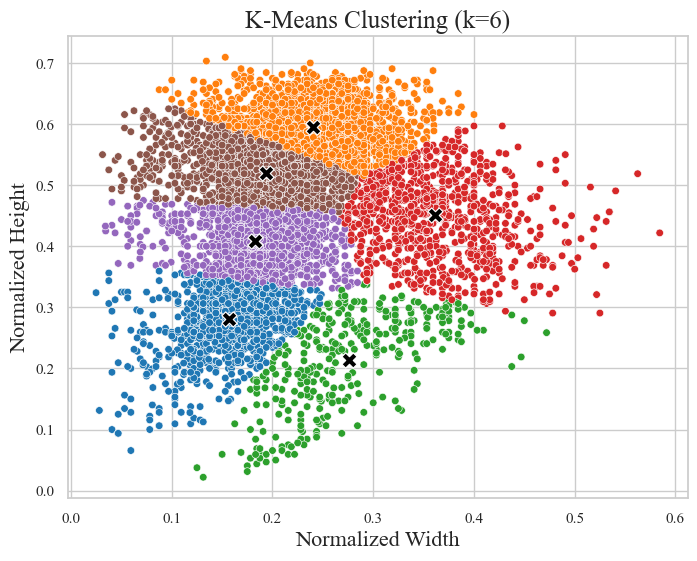


Cluster Centers for k=7:
  Cluster 0: Width=0.1753, Height=0.3360
  Cluster 1: Width=0.2379, Height=0.6043
  Cluster 2: Width=0.3753, Height=0.3573
  Cluster 3: Width=0.3261, Height=0.5106
  Cluster 4: Width=0.1854, Height=0.4473
  Cluster 5: Width=0.1942, Height=0.5355
  Cluster 6: Width=0.1674, Height=0.2197


<Figure size 640x480 with 0 Axes>

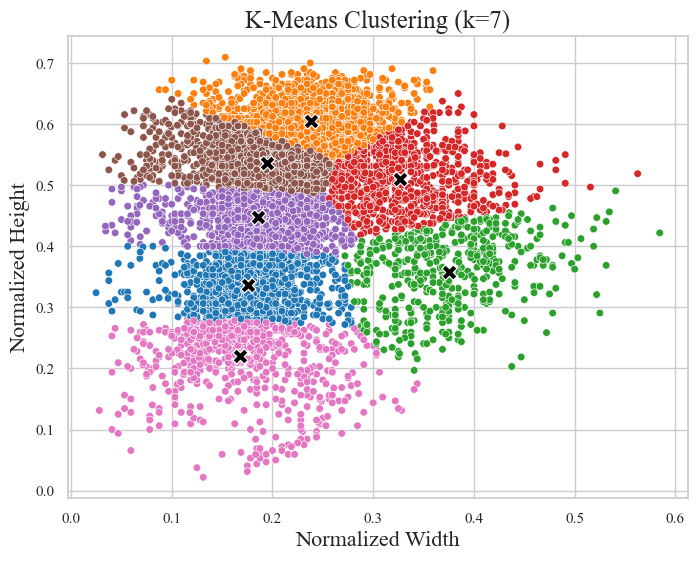


Cluster Centers for k=8:
  Cluster 0: Width=0.1621, Height=0.2869
  Cluster 1: Width=0.3206, Height=0.5131
  Cluster 2: Width=0.3798, Height=0.3677
  Cluster 3: Width=0.1878, Height=0.4811
  Cluster 4: Width=0.1827, Height=0.3854
  Cluster 5: Width=0.2454, Height=0.6103
  Cluster 6: Width=0.1971, Height=0.5538
  Cluster 7: Width=0.1963, Height=0.1703


<Figure size 640x480 with 0 Axes>

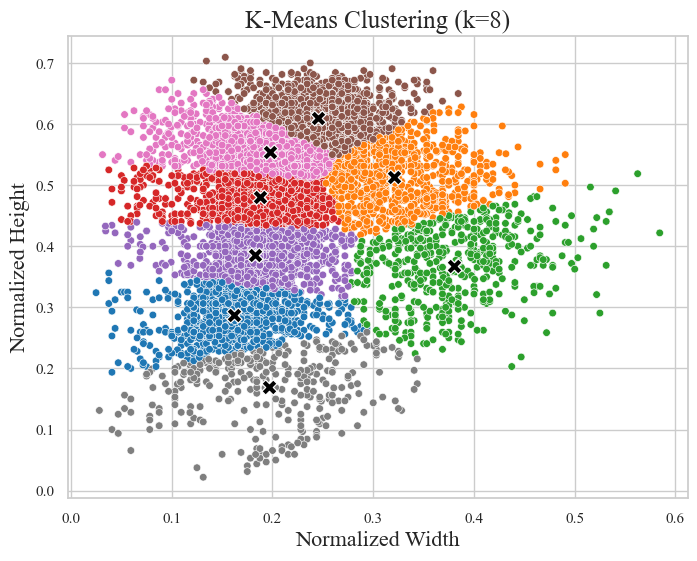


Cluster Centers for k=9:
  Cluster 0: Width=0.1619, Height=0.2883
  Cluster 1: Width=0.2836, Height=0.5488
  Cluster 2: Width=0.3543, Height=0.3207
  Cluster 3: Width=0.1907, Height=0.4832
  Cluster 4: Width=0.1806, Height=0.3875
  Cluster 5: Width=0.2364, Height=0.6169
  Cluster 6: Width=0.1916, Height=0.5560
  Cluster 7: Width=0.1812, Height=0.1652
  Cluster 8: Width=0.3685, Height=0.4618


<Figure size 640x480 with 0 Axes>

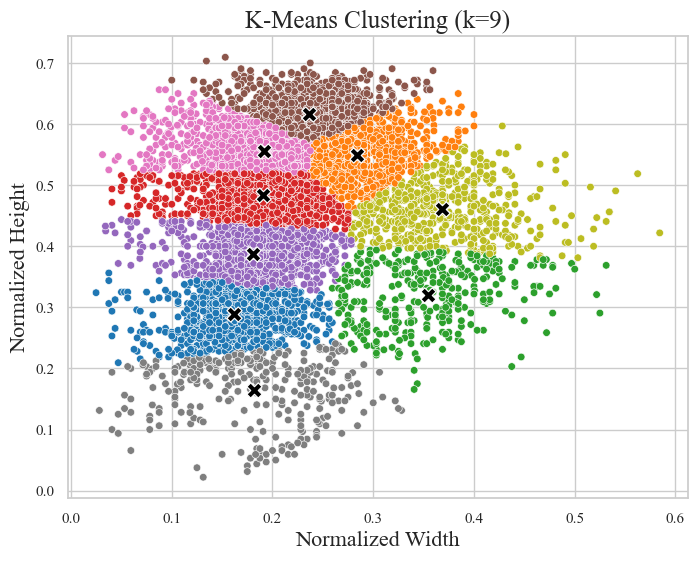


Cluster Centers for k=10:
  Cluster 0: Width=0.1604, Height=0.2865
  Cluster 1: Width=0.2994, Height=0.5677
  Cluster 2: Width=0.3403, Height=0.3082
  Cluster 3: Width=0.1717, Height=0.4755
  Cluster 4: Width=0.1821, Height=0.3830
  Cluster 5: Width=0.2287, Height=0.6140
  Cluster 6: Width=0.1938, Height=0.5508
  Cluster 7: Width=0.1803, Height=0.1624
  Cluster 8: Width=0.3819, Height=0.4508
  Cluster 9: Width=0.2395, Height=0.4926


<Figure size 640x480 with 0 Axes>

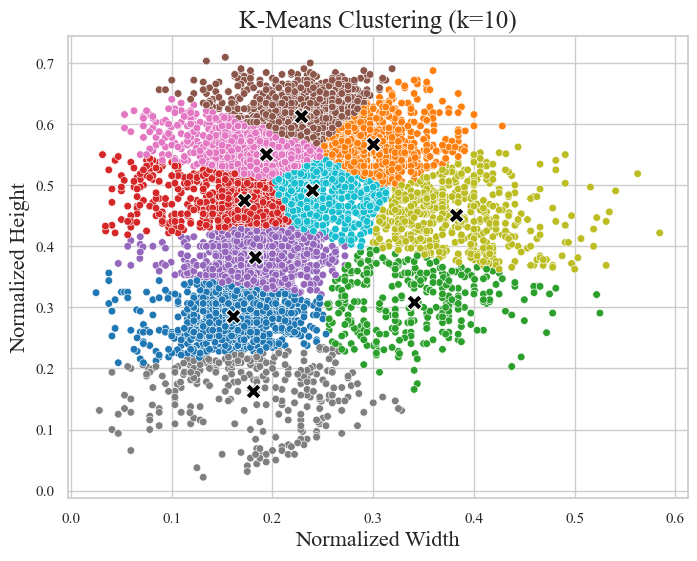

<Figure size 640x480 with 0 Axes>

In [2]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Seaborn style and font settings
sns.set(style='whitegrid')
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
})

# Directory containing YOLO labels
label_dir = 'data/train'

# Collect normalized width and height
widths = []
heights = []

for filename in os.listdir(label_dir):
    if filename.endswith(".txt"):
        filepath = os.path.join(label_dir, filename)
        with open(filepath, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) == 5:  # YOLO format: class x_center y_center width height
                    widths.append(float(parts[3]))
                    heights.append(float(parts[4]))

X = np.column_stack((widths, heights))

# Plot all bounding boxes (scatter plot)
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=widths, y=heights, s=30, color='dodgerblue', alpha=0.6, ax=ax)
ax.set_title('All Bounding Boxes (Normalized Width vs Height)')
ax.set_xlabel('Normalized Width')
ax.set_ylabel('Normalized Height')
fig.patch.set_alpha(0.0)
plt.savefig('all_bboxes.png', transparent=True, dpi=300)
plt.show()

# Apply KMeans clustering for k from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    centers = kmeans.cluster_centers_

    # Print centroid information
    print(f"\nCluster Centers for k={k}:")
    for idx, (w, h) in enumerate(centers):
        print(f"  Cluster {idx}: Width={w:.4f}, Height={h:.4f}")

    # Create cluster plot
    fig, ax = plt.subplots(figsize=(8, 6))
    palette = sns.color_palette("tab10", k)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette=palette, s=30, ax=ax, legend=False)
    sns.scatterplot(x=centers[:, 0], y=centers[:, 1], marker='X', color='black', s=120, ax=ax)

    ax.set_title(f'K-Means Clustering (k={k})')
    ax.set_xlabel('Normalized Width')
    ax.set_ylabel('Normalized Height')
    fig.patch.set_alpha(0.0)
    plt.savefig(f'kmeans_k{k}.png', transparent=True, dpi=300)
    plt.show()

    plt.savefig(f"transparent_plot_{k}.png", transparent=True, dpi=300)

# from google.colab import files
# files.download("transparent_plot.png")



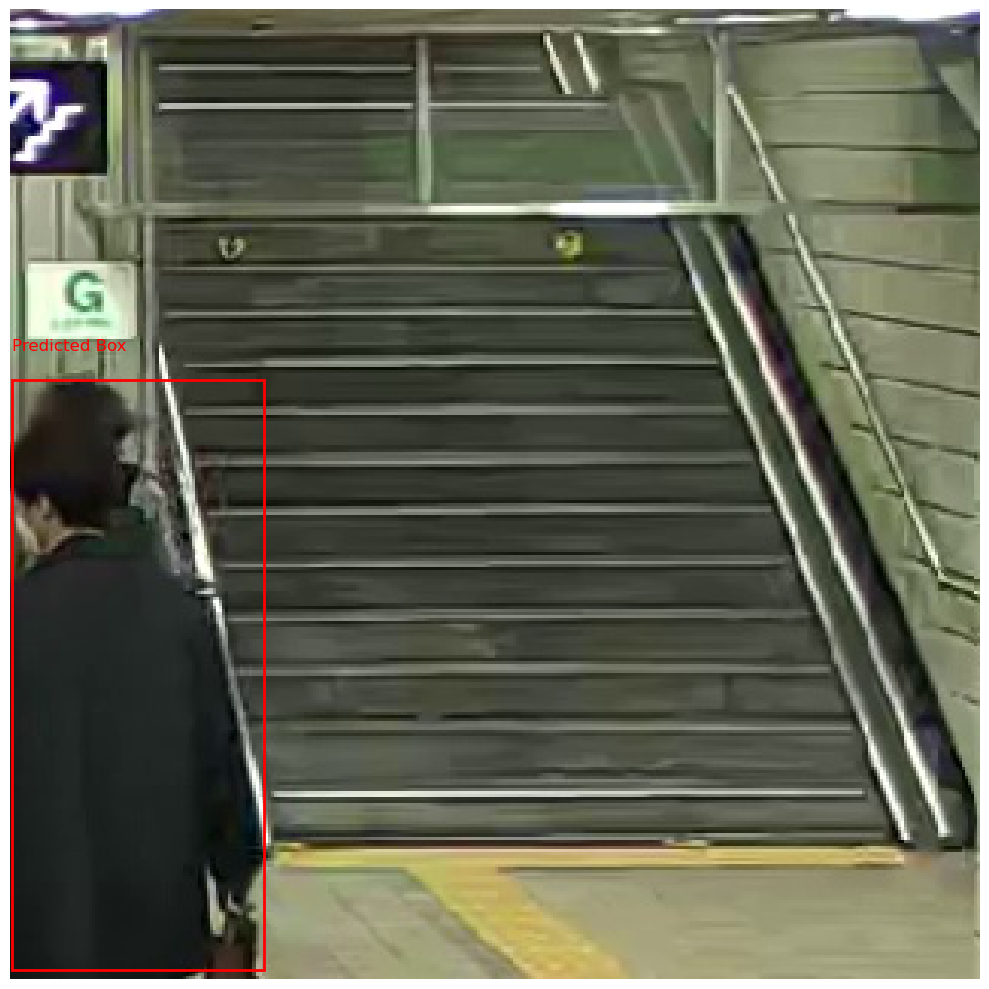

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# Image path
image_path = '/home/hj/Desktop/Dad/github/DUP/data/test/4_058020.jpg'

# Bounding box in COCO format: [x, y, width, height]
bbox = [0.023426055908203125, 122.0132064819336, 83.36765670776367, 194.3981704711914]

# Load and convert image from BGR (OpenCV) to RGB (Matplotlib)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create plot
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)

# Draw bounding box in red
x, y, w, h = bbox
rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)

# Optional: label the box
ax.text(x, y - 10, 'Predicted Box', color='red', fontsize=12)

# Show plot
plt.axis('off')
plt.tight_layout()
plt.show()


In [1]:
import json
import os
import cv2

# Paths
gt_path = '/home/hj/Desktop/Dad/github/DUP/data/coco_test.json'
pred_path = '/home/hj/Desktop/Dad/github/DUP/mmdetection/work_dirs/coco_detection/test_fasterrcnn.bbox.json'
img_dir = '/home/hj/Desktop/Dad/github/DUP/data/test'
output_dir = '/home/hj/Desktop/Dad/github/DUP/yolo_predictions'

# Create output directory if needed
os.makedirs(output_dir, exist_ok=True)

# Load ground truth and predictions
with open(gt_path, 'r') as f:
    coco_gt = json.load(f)

with open(pred_path, 'r') as f:
    predictions = json.load(f)

# Create mapping from image_id to file_name and image size
id_to_filename = {}
id_to_size = {}

for img in coco_gt['images']:
    img_path = os.path.join(img_dir, img['file_name'])
    if os.path.exists(img_path):
        image = cv2.imread(img_path)
        height, width = image.shape[:2]
        id_to_filename[img['id']] = img['file_name']
        id_to_size[img['id']] = (width, height)
    else:
        print(f"Warning: Image file not found: {img_path}")

# Collect predictions per image
pred_per_image = {}
for pred in predictions:
    img_id = pred['image_id']
    if img_id not in id_to_filename:
        continue
    filename = id_to_filename[img_id]
    width, height = id_to_size[img_id]
    x_min, y_min, box_w, box_h = pred['bbox']
    x_center = x_min + box_w / 2
    y_center = y_min + box_h / 2
    # Normalize
    x_center /= width
    y_center /= height
    box_w /= width
    box_h /= height
    # YOLO requires class IDs starting at 0 (adjust if needed)
    class_id = pred['category_id'] - 1

    yolo_line = f"{class_id} {x_center:.6f} {y_center:.6f} {box_w:.6f} {box_h:.6f}"

    base_name = os.path.splitext(filename)[0]
    out_path = os.path.join(output_dir, base_name + '.txt')

    # Append to corresponding file
    with open(out_path, 'a') as out_file:
        out_file.write(yolo_line + '\n')


## 1. Plot yolov9 results



(1) Unbalanced dataset train-val results

Plot generated: yolov9_udp/results_T_ITS_2026/Euljiro/1_2_1_Euljiro_off_peak_balanced_train_val_gelan-c/combined_plot_final.png
------------------------------
Stats - Max Val mAP: 0.9817 at Epoch 86
Stats - Min Gap: 0.0004 at Epoch 3
------------------------------


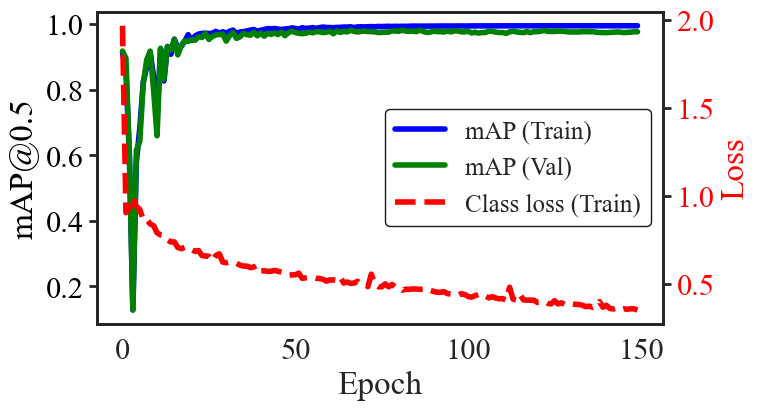

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# --- Configuration ---
file_results = r'yolov9_udp/results_T_ITS_2026/Euljiro/1_2_1_Euljiro_off_peak_balanced_train_val_gelan-c/results.csv'
file_metrics = r'yolov9_udp/results_T_ITS_2026/Euljiro/1_2_1_Euljiro_off_peak_balanced_train_val_gelan-c/train_metrics.csv'
output_file  = r'yolov9_udp/results_T_ITS_2026/Euljiro/1_2_1_Euljiro_off_peak_balanced_train_val_gelan-c/combined_plot_final.png'

def plot_combined():
    # --- 1. Load and Merge Data ---
    try:
        df_res = pd.read_csv(file_results)
        df_met = pd.read_csv(file_metrics)
    except FileNotFoundError as e:
        print(f"Error: Could not find file. {e}")
        return

    # Clean column names
    df_res.columns = df_res.columns.str.strip()
    df_met.columns = df_met.columns.str.strip()

    # Merge on 'epoch'
    if 'epoch' in df_res.columns and 'epoch' in df_met.columns:
        df = pd.merge(df_res, df_met, on='epoch', how='inner')
    else:
        print("Error: 'epoch' column missing. Cannot merge.")
        return

    # --- 2. Calculate Stats (For Printing) ---
    val_map_col = 'metrics/mAP_0.5' if 'metrics/mAP_0.5' in df.columns else 'metrics/mAP50(B)'
    val_map = df[val_map_col]
    train_map = df['train_map50']
    
    # Max Val mAP
    max_val_idx = val_map.idxmax()
    max_val_epoch = df.loc[max_val_idx, 'epoch']
    max_val_value = val_map.max()

    # Min Gap
    gap = (train_map - val_map).abs()
    min_gap_idx = gap.idxmin()
    min_gap_epoch = df.loc[min_gap_idx, 'epoch']
    min_gap_value = gap.min()

    # --- 3. Set Style (Times New Roman & Large Fonts) ---
    # CHANGED: Use 'white' style to remove background grid
    sns.set_style("white") 
    
    font_names = [f.name for f in fm.fontManager.ttflist]
    font_family = 'Times New Roman' if 'Times New Roman' in font_names else 'serif'

    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': [font_family],
        'mathtext.fontset': 'stix',
        'font.size': 20,
        'axes.labelsize': 24,
        'axes.titlesize': 26,
        'xtick.labelsize': 22,
        'ytick.labelsize': 22,
        'legend.fontsize': 18,
        'figure.titlesize': 28,
        'axes.linewidth': 2,
        # 'grid.linewidth': 1.5, # Grid settings removed
    })

    # --- 4. Setup Plot ---
    fig, ax1 = plt.subplots(figsize=(8, 4.5))

    # --- LEFT Y-Axis: mAP (Solid Lines) ---
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('mAP@0.5', color='black')

    # Plot mAP Curves
    l1 = ax1.plot(df['epoch'], train_map, color='blue', 
             linestyle='-', linewidth=4, label='mAP (Train)')
    l2 = ax1.plot(df['epoch'], val_map, color='green', 
             linestyle='-', linewidth=4, label='mAP (Val)')
    
    ax1.tick_params(axis='y', labelcolor='black', width=2, length=6)
    ax1.tick_params(axis='x', width=2, length=6)
    
    # CHANGED: Explicitly turn off grid
    ax1.grid(False) 

    # --- RIGHT Y-Axis: LOSS (Dashed Line) ---
    ax2 = ax1.twinx()
    color_loss = 'red'
    ax2.set_ylabel('Loss', color=color_loss)
    
    l3 = ax2.plot(df['epoch'], df['train/cls_loss'], color=color_loss, 
             linestyle='--', linewidth=4, label='Class loss (Train)')
    
    ax2.tick_params(axis='y', labelcolor=color_loss, width=2, length=6)
    ax2.grid(False) # Ensure secondary axis grid is off too

    # --- 5. Combined Legend ---
    lines = l1 + l2 + l3
    labels = [l.get_label() for l in lines]
    
    ax1.legend(lines, labels, loc='center right', frameon=True, 
               facecolor='white', framealpha=0.9, edgecolor='black')
    
    plt.tight_layout()
    plt.savefig(output_file, dpi=300)
    
    # --- 6. Print Stats ---
    print(f"Plot generated: {output_file}")
    print("-" * 30)
    print(f"Stats - Max Val mAP: {max_val_value:.4f} at Epoch {max_val_epoch}")
    print(f"Stats - Min Gap: {min_gap_value:.4f} at Epoch {min_gap_epoch}")
    print("-" * 30)
    
    plt.show()

if __name__ == "__main__":
    plot_combined()

In [3]:
pwd

'/mnt/Documents/Dad/github/DUP'

Plot generated: /mnt/Documents/Dad/github/DUP/yolov9_udp/runs/train/01_Euljiro_off_peak_unbalanced_train_val_gelan-c/map_gap_combined.png


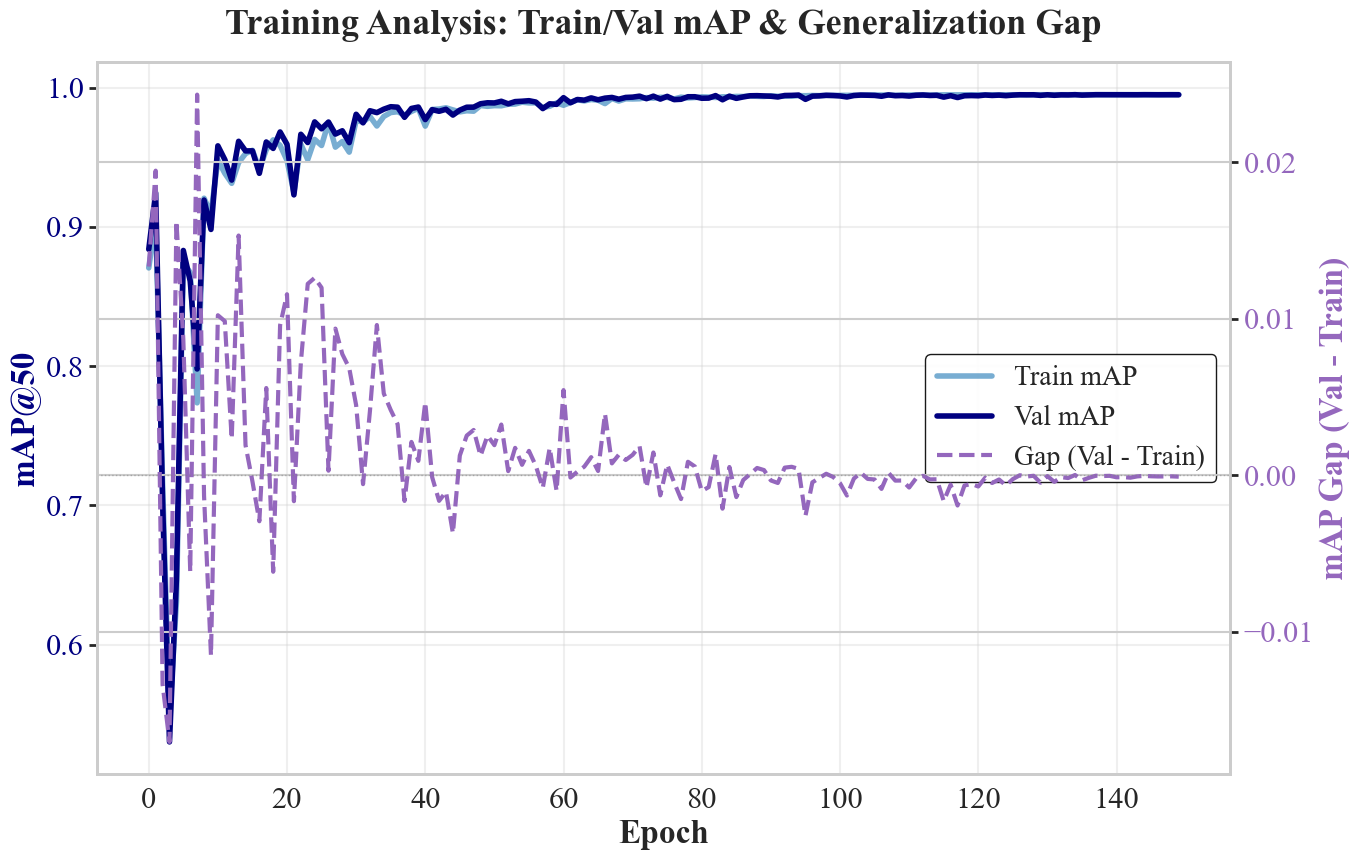

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# --- Configuration ---
file_results = r'/mnt/Documents/Dad/github/DUP/yolov9_udp/runs/train/01_Euljiro_off_peak_unbalanced_train_val_gelan-c/results.csv'
file_metrics = r'/mnt/Documents/Dad/github/DUP/yolov9_udp/runs/train/01_Euljiro_off_peak_unbalanced_train_val_gelan-c/train_metrics.csv'
output_file = r'/mnt/Documents/Dad/github/DUP/yolov9_udp/runs/train/01_Euljiro_off_peak_unbalanced_train_val_gelan-c/map_gap_combined.png'

def plot_all_map_metrics():
    # --- 1. Load and Merge Data ---
    try:
        df_res = pd.read_csv(file_results)
        df_met = pd.read_csv(file_metrics)
    except FileNotFoundError as e:
        print(f"Error: Could not find file. {e}")
        return

    # Clean column names
    df_res.columns = df_res.columns.str.strip()
    df_met.columns = df_met.columns.str.strip()

    # Merge on 'epoch'
    if 'epoch' in df_res.columns and 'epoch' in df_met.columns:
        df = pd.merge(df_res, df_met, on='epoch', how='inner')
    else:
        print("Error: 'epoch' column missing. Cannot merge.")
        return

    # Prepare Data Columns
    val_map_col = 'metrics/mAP_0.5' if 'metrics/mAP_0.5' in df.columns else 'metrics/mAP50(B)'
    train_map_col = 'train_map50'
    df['map_gap'] = df[val_map_col] - df[train_map_col]

    # --- 2. Set Style (Times New Roman & Large Fonts) ---
    sns.set_style("whitegrid")
    
    font_names = [f.name for f in fm.fontManager.ttflist]
    font_family = 'Times New Roman' if 'Times New Roman' in font_names else 'serif'

    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': [font_family],
        'mathtext.fontset': 'stix',
        'font.size': 20,
        'axes.labelsize': 24,
        'axes.titlesize': 26,
        'xtick.labelsize': 22,
        'ytick.labelsize': 22,
        'legend.fontsize': 20,
        'figure.titlesize': 28,
        'axes.linewidth': 2,
        'grid.linewidth': 1.5,
    })

    # --- 3. Setup Plot ---
    fig, ax1 = plt.subplots(figsize=(14, 9))

    # --- LEFT Y-Axis: Absolute mAP Values (Train & Val) ---
    color_train = 'tab:blue'
    color_val = 'navy'
    
    ax1.set_xlabel('Epoch', fontweight='bold')
    ax1.set_ylabel('mAP@50', color=color_val, fontweight='bold')

    # Line 1: Train mAP
    l1 = ax1.plot(df['epoch'], df[train_map_col], color=color_train, 
             linestyle='-', linewidth=4, alpha=0.6, label='Train mAP')
    
    # Line 2: Val mAP
    l2 = ax1.plot(df['epoch'], df[val_map_col], color=color_val, 
             linestyle='-', linewidth=4, label='Val mAP')

    ax1.tick_params(axis='y', labelcolor=color_val, width=2, length=6)
    ax1.tick_params(axis='x', width=2, length=6)
    ax1.grid(True, alpha=0.3)

    # --- RIGHT Y-Axis: The Gap (Val - Train) ---
    ax2 = ax1.twinx()
    color_gap = 'tab:purple'
    ax2.set_ylabel('mAP Gap (Val - Train)', color=color_gap, fontweight='bold')

    # Line 3: Gap
    l3 = ax2.plot(df['epoch'], df['map_gap'], color=color_gap, 
             linestyle='--', linewidth=3, label='Gap (Val - Train)')
    
    # Add a zero reference line for the gap
    ax2.axhline(0, color='gray', linewidth=1, linestyle=':', alpha=0.5)

    ax2.tick_params(axis='y', labelcolor=color_gap, width=2, length=6)

    # --- 4. Combined Legend ---
    lines = l1 + l2 + l3
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='center right', frameon=True, facecolor='white', framealpha=0.9, edgecolor='black')

    # Title
    plt.title('Training Analysis: Train/Val mAP & Generalization Gap', pad=20, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(output_file, dpi=300)
    print(f"Plot generated: {output_file}")
    plt.show()

if __name__ == "__main__":
    plot_all_map_metrics()

## Finding STD

In [ ]:
import numpy as np

# Your results
scores = [97.662, 97.721, 96.963, 97.727, 97.647]

mean_val = np.mean(scores)
std_val = np.std(scores, ddof=1) # ddof=1 calculates Sample Std Dev (n-1)

print(f"Mean: {mean_val:.2f}")
print(f"Std : {std_val:.2f}")

Mean: 97.54
Std : 0.33


## Manually checking the failed cases.

In [3]:
%cd yolov9_udp/

/mnt/Documents/Dad/github/DUP/yolov9_udp


In [ ]:
DDD

Processing 61 images...
Saving to: /mnt/Documents/Dad/github/DUP/yolov9_udp/runs/detect/exp30/comparison_colored


100%|██████████| 61/61 [00:00<00:00, 431.64it/s]



🚀 Processing Split: am_peak...
   📂 Inputs: /mnt/Documents/Dad/github/DUP/yolov9_udp/runs/detect/am_peak/labels
   💾 Output: /mnt/Documents/Dad/github/DUP/yolov9_udp/runs/detect/am_peak/viz_descending


100%|██████████| 61/61 [00:00<00:00, 745.98it/s]


   ✅ Done! Saved 7 comparison images.

🚀 Processing Split: pm_peak...
   📂 Inputs: /mnt/Documents/Dad/github/DUP/yolov9_udp/runs/detect/pm_peak/labels
   💾 Output: /mnt/Documents/Dad/github/DUP/yolov9_udp/runs/detect/pm_peak/viz_descending


100%|██████████| 100/100 [00:00<00:00, 513.04it/s]


   ✅ Done! Saved 55 comparison images.

🚀 Processing Split: off_peak...
   📂 Inputs: /mnt/Documents/Dad/github/DUP/yolov9_udp/runs/detect/off_peak/labels
   💾 Output: /mnt/Documents/Dad/github/DUP/yolov9_udp/runs/detect/off_peak/viz_descending


100%|██████████| 536/536 [00:00<00:00, 1613.90it/s]

   ✅ Done! Saved 289 comparison images.


Checking 100 images...


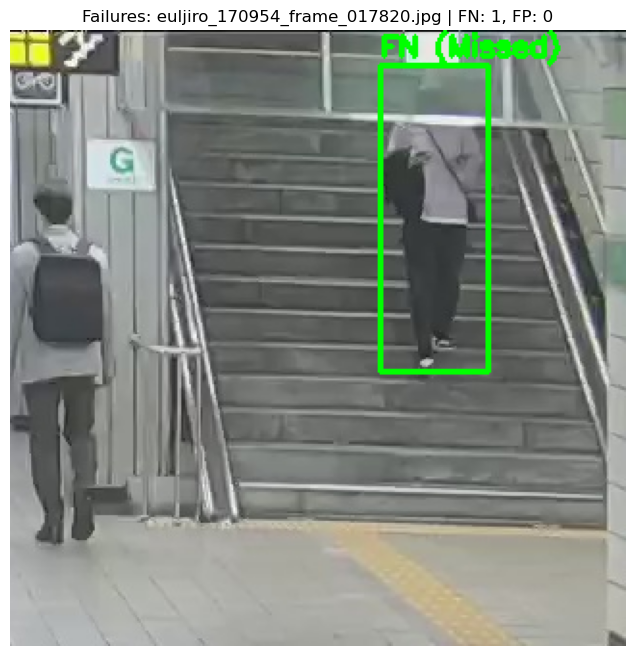

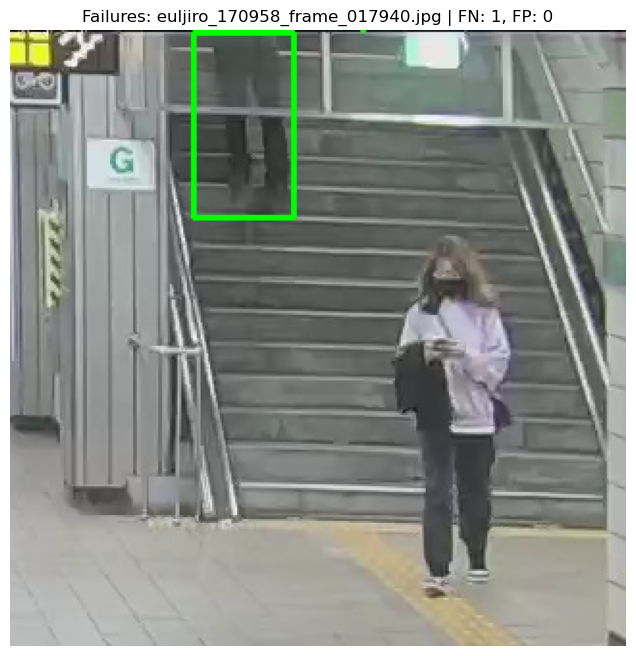

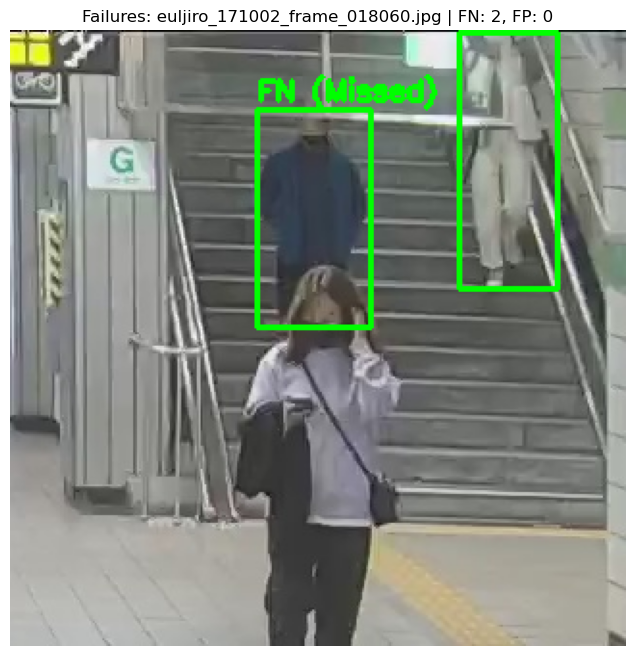

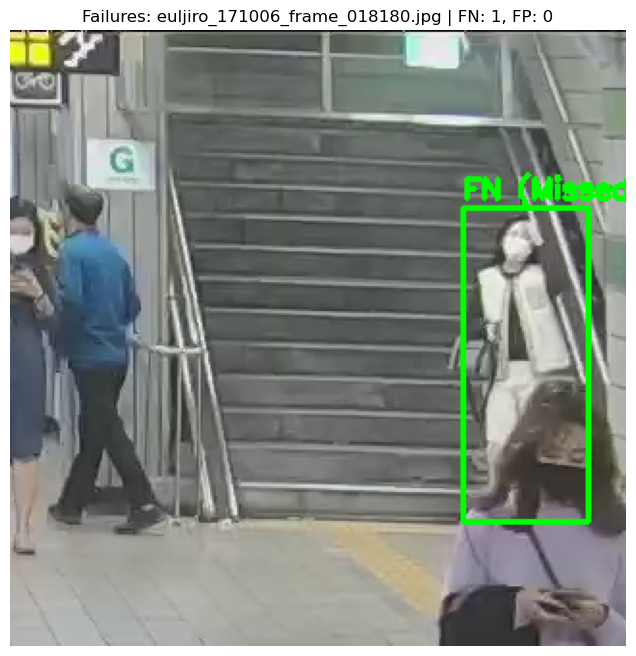

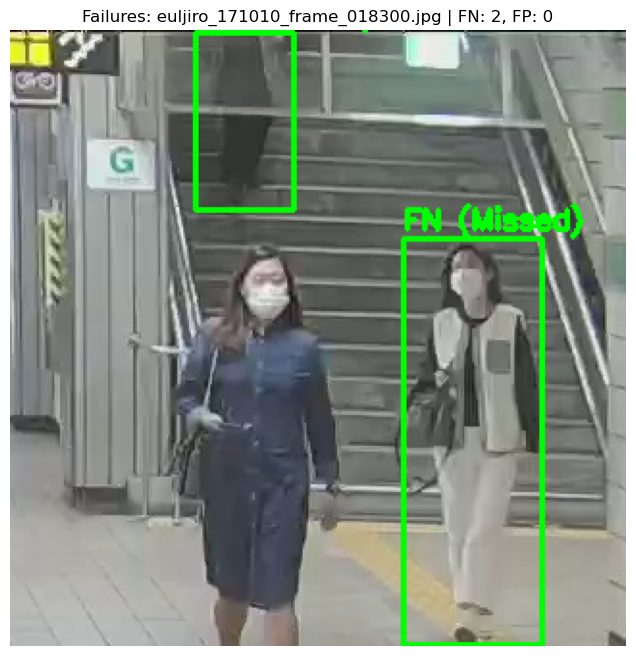

In [9]:
import cv2
import os
import glob
import matplotlib.pyplot as plt

# ================= CONFIGURATION =================
# Update these paths to match your folder structure
IMAGE_DIR = '/mnt/Documents/Dad/github/DUP/DATA/Euljiro/4_peak_n_offpeak_combined/test_splitted/pm_peak'       
GT_DIR    = '/mnt/Documents/Dad/github/DUP/DATA/Euljiro/4_peak_n_offpeak_combined/test_splitted/pm_peak'         
PRED_DIR  = 'runs/detect/exp/labels' 

TARGET_CLASS_ID = 1  # The class ID for "descending"
IOU_THRESH = 0.5     # Threshold to count as a correct prediction
SHOW_LIMIT = 5       # Stop after showing this many failure cases
# =================================================

def xywh2xyxy(x, y, w, h, width, height):
    x1 = int((x - w / 2) * width)
    y1 = int((y - h / 2) * height)
    x2 = int((x + w / 2) * width)
    y2 = int((y + h / 2) * height)
    return x1, y1, x2, y2

def compute_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    intersection = max(0, x2 - x1) * max(0, y2 - y1)
    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union = area1 + area2 - intersection
    return intersection / union if union > 0 else 0

def load_boxes(file_path, width, height, target_class):
    boxes = []
    if not os.path.exists(file_path): return boxes
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if int(parts[0]) == target_class:
                x, y, w, h = map(float, parts[1:5])
                conf = float(parts[5]) if len(parts) > 5 else 1.0
                x1, y1, x2, y2 = xywh2xyxy(x, y, w, h, width, height)
                boxes.append({'coords': (x1, y1, x2, y2), 'conf': conf, 'matched': False})
    return boxes

# Get list of images
image_paths = sorted(glob.glob(os.path.join(IMAGE_DIR, '*.jpg')) + glob.glob(os.path.join(IMAGE_DIR, '*.png')))
print(f"Checking {len(image_paths)} images...")

shown_count = 0

for img_path in image_paths:
    if shown_count >= SHOW_LIMIT: break # Stop after showing N failures
    
    filename = os.path.basename(img_path)
    label_file = filename.rsplit('.', 1)[0] + '.txt'
    
    gt_path = os.path.join(GT_DIR, label_file)
    pred_path = os.path.join(PRED_DIR, label_file)

    # Read image (OpenCV reads as BGR, convert to RGB for Matplotlib)
    img = cv2.imread(img_path)
    if img is None: continue
    h, w, _ = img.shape
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    gt_boxes = load_boxes(gt_path, w, h, TARGET_CLASS_ID)
    pred_boxes = load_boxes(pred_path, w, h, TARGET_CLASS_ID)

    # Match Predictions to Ground Truth
    for gt in gt_boxes:
        best_iou = 0
        best_pred_idx = -1
        for i, pred in enumerate(pred_boxes):
            iou = compute_iou(gt['coords'], pred['coords'])
            if iou > best_iou:
                best_iou = iou
                best_pred_idx = i
        if best_iou >= IOU_THRESH:
            gt['matched'] = True
            pred_boxes[best_pred_idx]['matched'] = True

    # Identify Failures
    false_negatives = [b for b in gt_boxes if not b['matched']]
    false_positives = [b for b in pred_boxes if not b['matched']]

    # Only display if there is a failure
    if not false_negatives and not false_positives:
        continue

    # --- DRAWING ---
    # Green = Missed GT (False Negative)
    for box in false_negatives:
        x1, y1, x2, y2 = box['coords']
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img_rgb, "FN (Missed)", (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Red = Wrong Prediction (False Positive)
    for box in false_positives:
        x1, y1, x2, y2 = box['coords']
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(img_rgb, f"FP {box['conf']:.2f}", (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display using Matplotlib
    plt.figure(figsize=(12, 8))
    plt.imshow(img_rgb)
    plt.title(f"Failures: {filename} | FN: {len(false_negatives)}, FP: {len(false_positives)}")
    plt.axis('off')
    plt.show()
    
    shown_count += 1

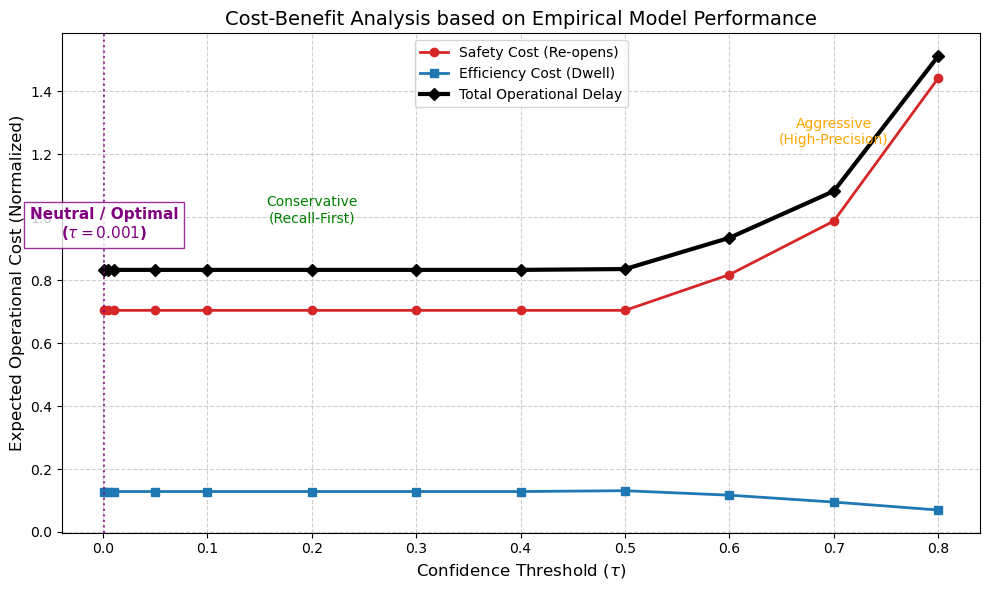

Optimal Threshold: 0.001
Minimum Cost: 0.8329


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. 실제 모델 성능 데이터 (제공해주신 값)
# ==========================================
confs = np.array([0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
recalls = np.array([0.9380, 0.9380, 0.9380, 0.9380, 0.9380, 0.9380, 0.9380, 0.9380, 0.9380, 0.9280, 0.9130, 0.8730])
precisions = np.array([0.9480, 0.9480, 0.9480, 0.9480, 0.9480, 0.9480, 0.9480, 0.9480, 0.9470, 0.9520, 0.9600, 0.9690])

# ==========================================
# 2. 비용 파라미터 (서울메트로 2호선 분석 결과)
# ==========================================
cost_fn_weight = 11.36  # 미검지 비용 (재개방 지연, 초)
cost_fp_weight = 2.5    # 오탐 비용 (불필요한 대기, 초)

# ==========================================
# 3. 비용 계산 (Cost Calculation)
# ==========================================
# N_GT (Ground Truth 객체 수)를 1로 정규화했을 때의 "객체당 평균 기대 비용"을 계산합니다.

# 미검지 확률 (False Negative Rate) = 1 - Recall
prob_fn = 1 - recalls
cost_fn = prob_fn * cost_fn_weight

# 오탐 비율 (False Positive Ratio relative to GT)
# FP 개수 추정 로직:
# Precision (P) = TP / (TP + FP)
# => TP + FP = TP / P
# => FP = (TP / P) - TP = TP * (1/P - 1)
# 여기서 TP = N_GT * Recall 이므로,
# FP_ratio (FP / N_GT) = Recall * (1/P - 1)
prob_fp = recalls * ((1 / precisions) - 1)
cost_fp = prob_fp * cost_fp_weight

# 총 비용 (Total Operational Cost)
total_cost = cost_fn + cost_fp

# ==========================================
# 4. 시각화 (Visualization)
# ==========================================
plt.figure(figsize=(10, 6))

# 데이터가 이산적(Discrete)이므로 부드러운 곡선보다는 점과 선으로 표현하는 것이 정확합니다.
plt.plot(confs, cost_fn, label='Safety Cost (Re-opens)', 
         color='#d62728', marker='o', linestyle='-', linewidth=2)
plt.plot(confs, cost_fp, label='Efficiency Cost (Dwell)', 
         color='#1f77b4', marker='s', linestyle='-', linewidth=2)
plt.plot(confs, total_cost, label='Total Operational Delay', 
         color='black', marker='D', linewidth=3)

# 최적점 찾기 (Total Cost가 가장 낮은 점)
optimal_idx = np.argmin(total_cost)
opt_thresh = confs[optimal_idx]
min_cost = total_cost[optimal_idx]

# 최적점 주석
plt.axvline(x=opt_thresh, color='purple', linestyle=':', alpha=0.8)
plt.text(opt_thresh, min_cost + 0.1, f'Neutral / Optimal\n($\\tau={opt_thresh}$)', 
         color='purple', ha='center', fontweight='bold', fontsize=11, 
         bbox=dict(facecolor='white', edgecolor='purple', alpha=0.8))

# 전략 구간 표시 (데이터 특성에 맞춰 조정)
# Conservative: 낮은 Threshold (0.2 부근)
plt.text(0.2, total_cost[5] + 0.15, 'Conservative\n(Recall-First)', 
         color='green', ha='center', fontsize=10)

# Aggressive: 높은 Threshold (0.7 부근)
plt.text(0.7, total_cost[10] + 0.15, 'Aggressive\n(High-Precision)', 
         color='orange', ha='center', fontsize=10)

plt.xlabel('Confidence Threshold ($\\tau$)', fontsize=12)
plt.ylabel('Expected Operational Cost (Normalized)', fontsize=12)
plt.title('Cost-Benefit Analysis based on Empirical Model Performance', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# 그래프 저장 및 출력
# plt.savefig('empirical_cost_benefit_curve.png', dpi=300)
plt.show()

print(f"Optimal Threshold: {opt_thresh}")
print(f"Minimum Cost: {min_cost:.4f}")